In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.11.0


## Dense Layer
[Dense Layer](https://keras.io/layers/core/#dense)  
keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)  

Dense Layer就是平时说的fully connected layer,也就是常见的隐藏层. Keras上的说法是**_Just your regular densely-connected NN layer._**  
* units : 该隐藏层神经元的个数
* activation: 激活函数，默认是不使用激活函数
* use_bias: 是否使用偏置

In [ ]:
model = keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(keras.layers.Dense(64, activation='relu'))

## Loading Dataset

In [2]:
boston_housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
# Shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [3]:
print (train_data.shape, train_labels.shape)

(404, 13) (404,)


In [4]:
print (test_data.shape, test_labels.shape)

(102, 13) (102,)


In [5]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


## Normalize features

In [7]:
# Test data is *not* used when calculating the mean and std

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.397253,1.412057,-1.126646,-0.256833,-1.027385,0.726354,-1.000164,0.023834,-0.511142,-0.047533,-1.490674,0.415841,-0.836487
1,0.087846,-0.483615,1.028326,-0.256833,1.371293,-3.817250,0.676891,-1.049006,1.675886,1.565287,0.784476,-0.000885,-0.775760
2,-0.395379,1.201427,-0.690066,-0.256833,-0.942023,0.827918,-0.939245,0.259915,-0.626249,-0.914123,-0.398602,0.448077,-1.347144
3,-0.403759,3.097099,-1.022279,-0.256833,-1.095675,0.351129,-1.480347,2.364762,-0.626249,-0.330379,-0.262093,0.400521,-0.880652
4,-0.348692,-0.483615,-0.720935,-0.256833,-0.455458,3.467186,0.501302,-0.417158,-0.165822,-0.595170,-0.489608,0.289557,-1.119419


## Create model


In [15]:
from keras.models import Sequential
from keras.layers import Input, Dense

model = Sequential()


# seems no need to add input layer
# Instead, using the input_shape or input_dim to specify the shape for Input
# x = Input(shape=(train_data.shape[1],))
#dense_layer = Dense(1, activation='linear', input_shape=(train_data.shape[1],))

# dense_layer = Dense(1, activation='linear', input_shape=(train_data.shape[1],))
# model.add(dense_layer)

#model.add(dense_layer)
# model.add(Dense(512,activation = 'relu',input_dim = 784))

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
dense_layer = Dense(1, activation='linear', input_shape=(train_data.shape[1],))
model.add(dense_layer)

optimizer = tf.train.RMSPropOptimizer(0.001)

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(train_data, train_labels, batch_size=5, epochs=100, shuffle=False)

Epoch 1/100
404/404 [==============================] - 0s 583us/step - loss: 594.1066 - mean_absolute_error: 22.3527
Epoch 2/100
404/404 [==============================] - 0s 231us/step - loss: 586.9751 - mean_absolute_error: 22.2721
Epoch 3/100
404/404 [==============================] - 0s 271us/step - loss: 580.1931 - mean_absolute_error: 22.1927
Epoch 4/100
404/404 [==============================] - 0s 278us/step - loss: 573.6540 - mean_absolute_error: 22.1132
Epoch 5/100
404/404 [==============================] - 0s 288us/step - loss: 567.3412 - mean_absolute_error: 22.0337
Epoch 6/100
404/404 [==============================] - 0s 271us/step - loss: 561.2392 - mean_absolute_error: 21.9542
Epoch 7/100
404/404 [==============================] - 0s 285us/step - loss: 555.3336 - mean_absolute_error: 21.8746
Epoch 8/100
404/404 [==============================] - 0s 335us/step - loss: 549.6105 - mean_absolute_error: 21.7950
Epoch 9/100
404/404 [==============================] - 0s 325us/

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense
import matplotlib.pyplot as plt

import numpy as np

print(tf.__version__)


# Downloading datasets
boston_housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
# Shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std


column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
print (df.head())

# Let's create the model
model = Sequential()
# model.add(Dense(1, activation='linear', input_shape=(train_data.shape[1],)))
dense_layer = Dense(1, activation='linear', input_shape=(train_data.shape[1],))
model.add(dense_layer)

optimizer = tf.train.RMSPropOptimizer(0.001)

model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

model.summary()

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  # plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
  #          label = 'Val loss')
  plt.legend()
  plt.ylim([0, 5])


history = model.fit(train_data, train_labels, epochs=100, batch_size=50, shuffle=False)



C:\Users\wanga26\AppData\Local\Continuum\anaconda3\envs\cs231n\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


1.11.0
       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.397253  1.412057 -1.126646 -0.256833 -1.027385  0.726354 -1.000164   
1  0.087846 -0.483615  1.028326 -0.256833  1.371293 -3.817250  0.676891   
2 -0.395379  1.201427 -0.690066 -0.256833 -0.942023  0.827918 -0.939245   
3 -0.403759  3.097099 -1.022279 -0.256833 -1.095675  0.351129 -1.480347   
4 -0.348692 -0.483615 -0.720935 -0.256833 -0.455458  3.467186  0.501302   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0  0.023834 -0.511142 -0.047533 -1.490674  0.415841 -0.836487  
1 -1.049006  1.675886  1.565287  0.784476 -0.000885 -0.775760  
2  0.259915 -0.626249 -0.914123 -0.398602  0.448077 -1.347144  
3  2.364762 -0.626249 -0.330379 -0.262093  0.400521 -0.880652  
4 -0.417158 -0.165822 -0.595170 -0.489608  0.289557 -1.119419  
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)           

Epoch 60/100
404/404 [==============================] - 0s 47us/step - loss: 542.7187 - mean_absolute_error: 21.8528
Epoch 61/100
404/404 [==============================] - 0s 45us/step - loss: 541.9870 - mean_absolute_error: 21.8438
Epoch 62/100
404/404 [==============================] - 0s 40us/step - loss: 541.2601 - mean_absolute_error: 21.8348
Epoch 63/100
404/404 [==============================] - 0s 42us/step - loss: 540.5378 - mean_absolute_error: 21.8258
Epoch 64/100
404/404 [==============================] - 0s 35us/step - loss: 539.8200 - mean_absolute_error: 21.8168
Epoch 65/100
404/404 [==============================] - 0s 30us/step - loss: 539.1067 - mean_absolute_error: 21.8079
Epoch 66/100
404/404 [==============================] - 0s 27us/step - loss: 538.3978 - mean_absolute_error: 21.7989
Epoch 67/100
404/404 [==============================] - 0s 27us/step - loss: 537.6933 - mean_absolute_error: 21.7899
Epoch 68/100
404/404 [==============================] - 0s 37us/

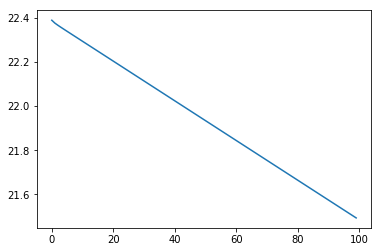

In [5]:
plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')

In [6]:
predict_labels = model.predict(test_data)

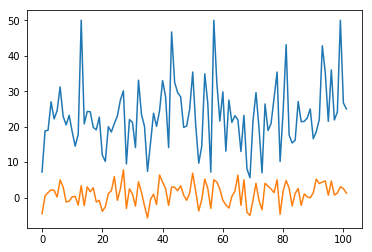

In [8]:
plt.plot(test_labels)
plt.plot(predict_labels)